In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### Quiz 2 - Regression (Supervised Learning)


##### Part 1 - (100pts)

A medical insurance company would like you to create a program wherein they will be able to assess if a user is a smoker or not. Based on these findings, the company will then determine how much it will charge a certain client. The following is the flow process of how the program should work:

1. The company is only allowed to ask the following questions:
   a. Full name of the client.
   b. Sex, age, weight, and height.
   c. Number of children
2. The program will then compute the BMI.
3. The program will first consider sex as its first selection.
4. Then the program will then use age, BMI, and number of children to determine if the user is a smoker or not.
5. Then after classifying the smoker feature of the client, the program will then determine how much the client will then be charged based on the age, BMI, and number of children.

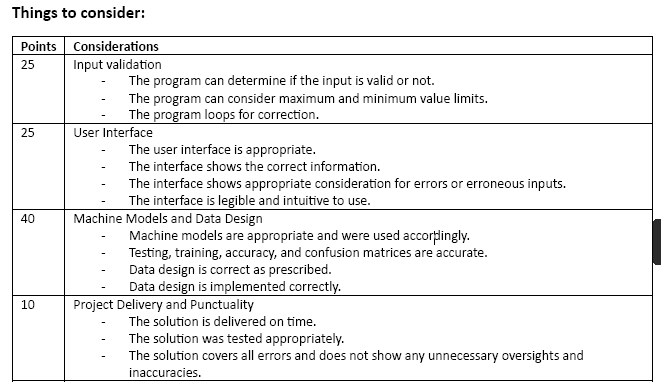


Based on the heatmap above we can see that the smoker feature is highly correlated to the charges feature.


### Load the dataset


In [3]:
df = pd.read_csv("../datasets/medinsur-1.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


### Pre-process data


In [4]:
# Start converting categorical variables to numerical
label_encoder = LabelEncoder()

# Convert the sex column to numerical
df["sex"] = label_encoder.fit_transform(df["sex"])

# Convert the smoker column to numerical
df["smoker"] = label_encoder.fit_transform(df["smoker"])

# Convert the region column to numerical
df["region"] = label_encoder.fit_transform(df["region"])

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.920
1,18,1,33.770,1,0,2,1725.552
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.470
4,32,1,28.880,0,0,1,3866.855


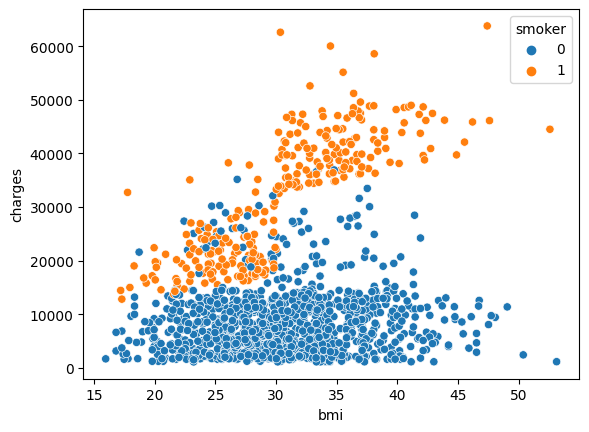

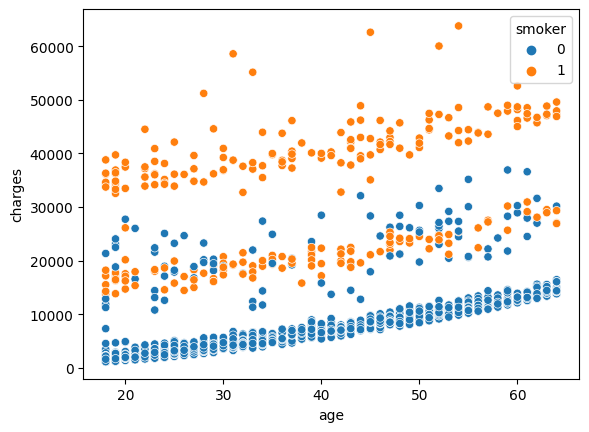

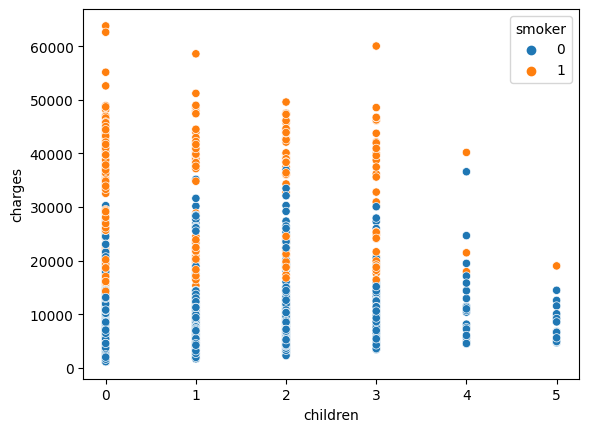

In [6]:
# Create a scatter plot for bmi vs smoker
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.show()

# Create a scatter plot for age vs smoker
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.show()

# Create a scatter plot for children vs smoker
sns.scatterplot(x="children", y="charges", hue="smoker", data=df)
plt.show()

### Separate the datasets into female and male sexes


In [7]:
# Seperate the dataframe into male and female
male_df = df.where(df["sex"] == 1).dropna()
female_df = df.where(df["sex"] == 0).dropna()

#### 1. Train a model that uses age, BMI, and number of children to determine if the user is a smoker or not.


In [8]:
def get_x_and_y(sex: str):
    """
    Returns the x and y values for the given sex
    """
    # Get the x and y values for the given sex
    df: pd.DataFrame

    if sex == "male":
        df = male_df
    else:
        df = female_df

    x = df[["age", "bmi", "children"]]
    y = df["smoker"]
    return x, y


male_x, male_y = get_x_and_y("male")
female_x, female_y = get_x_and_y("female")

male_x_train, male_x_test, male_y_train, male_y_test = train_test_split(
    male_x, male_y, test_size=0.3, random_state=0
)

female_x_train, female_x_test, female_y_train, female_y_test = train_test_split(
    female_x, female_y, test_size=0.3, random_state=0
)

# Create the model and train
smoker_male_classifier = LogisticRegression()
smoker_male_classifier.fit(male_x_train, male_y_train)

smoker_female_classifier = LogisticRegression()
smoker_female_classifier.fit(female_x_train, female_y_train)

LogisticRegression()

In [9]:
# Evaluate the model by scoring
smoker_male_score = smoker_male_classifier.score(male_x_test, male_y_test)
smoker_female_score = smoker_female_classifier.score(female_x_test, female_y_test)

print(f"Smoker [Male] Score Test Data: {smoker_male_score * 100}")
print(f"Smoker [Female] Score Test Data: {smoker_female_score * 100}")

Smoker [Male] Score Test Data: 77.83251231527095
Smoker [Female] Score Test Data: 80.40201005025126


#### 2. Train different models for each sex if they are a smoker or not.


In [10]:
def create_charges_model(df: pd.DataFrame):
    x = df[["age", "bmi", "children"]]
    y = df["charges"]
    (
        x_train,
        x_test,
        y_train,
        y_test,
    ) = train_test_split(x, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    model.fit(x_train, y_train)

    return model, x_train, x_test, y_train, y_test


smoker_male_df = male_df.where(male_df["smoker"] == 1).dropna()
(
    smoker_male_charges_classifier,
    smoker_male_charges_x_train,
    smoker_male_charges_x_test,
    smoker_male_charges_y_train,
    smoker_male_charges_y_test,
) = create_charges_model(smoker_male_df)

non_smoker_male_df = male_df.where(male_df["smoker"] == 0).dropna()
(
    non_smoker_male_charges_classifier,
    non_smoker_male_charges_x_train,
    non_smoker_male_charges_x_test,
    non_smoker_male_charges_y_train,
    non_smoker_male_charges_y_test,
) = create_charges_model(non_smoker_male_df)

smoker_female_df = female_df.where(female_df["smoker"] == 1).dropna()
(
    smoker_female_charges_classifier,
    smoker_female_charges_x_train,
    smoker_female_charges_x_test,
    smoker_female_charges_y_train,
    smoker_female_charges_y_test,
) = create_charges_model(smoker_female_df)

non_smoker_female_df = female_df.where(female_df["smoker"] == 0).dropna()
(
    non_smoker_female_charges_classifier,
    non_smoker_female_charges_x_train,
    non_smoker_female_charges_x_test,
    non_smoker_female_charges_y_train,
    non_smoker_female_charges_y_test,
) = create_charges_model(non_smoker_female_df)

In [11]:
# Evaluate all the models by scoring them
def score_model(model, x_test, y_test):
    score = model.score(x_test, y_test)
    return score

smoker_male_charges_score = score_model(smoker_male_charges_classifier, smoker_male_charges_x_test, smoker_male_charges_y_test)
print(f"Smoker Male Charges [Test] Score: {smoker_male_charges_score * 100}")
non_smoker_male_charges_score = score_model(non_smoker_male_charges_classifier, non_smoker_male_charges_x_test, non_smoker_male_charges_y_test)
print(f"Non-Smoker Male Charges [Test] Score: {non_smoker_male_charges_score * 100}")

smoker_female_charges_score = score_model(smoker_female_charges_classifier, smoker_female_charges_x_test, smoker_female_charges_y_test)
print(f"Smoker Female Charges [Test] Score: {smoker_female_charges_score * 100}")
non_smoker_female_charges_score = score_model(non_smoker_female_charges_classifier, non_smoker_female_charges_x_test, non_smoker_female_charges_y_test)
print(f"Non-Smoker Female Charges [Test] Score: {non_smoker_female_charges_score * 100}")


Smoker Male Charges [Test] Score: 77.10258908339543
Non-Smoker Male Charges [Test] Score: 48.23562747209779
Smoker Female Charges [Test] Score: 77.16121222750346
Non-Smoker Female Charges [Test] Score: 35.52780840564315


In [16]:
# Save the models
import pickle


def save_model(file_name: str, model):
    with open(f"../../models/{file_name}", 'wb') as f:
        pickle.dump(model, f)


save_model('smoker_male_model.pb', smoker_male_classifier)
save_model('smoker_female_model.pb', smoker_female_classifier)

save_model('smoker_male_charges_model.pb', smoker_male_charges_classifier)
save_model('smoker_female_charges_model.pb', smoker_female_charges_classifier)

save_model('non_smoker_male_charges_model.pb', non_smoker_male_charges_classifier)
save_model('non_smoker_female_charges_model.pb', non_smoker_female_charges_classifier)

### GUI (Graphical User Interface)


In [12]:
# Get the min max values for the age and bmi
age_min = df["age"].min()
age_max = df["age"].max()

bmi_min = df["bmi"].min()
bmi_max = df["bmi"].max()

children_min = df["children"].min()
children_max = df["children"].max()

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output

input_dict = {"sex": "", "age": 18, "height": 0, "weight": 0, "children": 0}

has_selected_sex = input_dict["sex"] != ""

# Create the widgets
sex_dropdown = widgets.Dropdown(
    value=input_dict["sex"],
    options=["", "Male", "Female"],
    description="Sex: ",
)

age_input = widgets.BoundedIntText(
    value=input_dict["age"],
    min=age_min,
    max=age_max,
    description="Age:",
    disabled=not has_selected_sex,
    continuous_update=False,
)

height_input = widgets.BoundedFloatText(
    value=input_dict["height"],
    description="Height (CM):",
    disabled=not has_selected_sex,
    continuous_update=False,
    min=0,
    max=300,
)

weight_input = widgets.BoundedFloatText(
    value=input_dict["weight"],
    description="Weight (KG):",
    disabled=not has_selected_sex,
    min=0,
    continuous_update=False,
    # As the world's heaviest man weighs 635kg
    max=700,
)

children_input = widgets.IntSlider(
    value=input_dict["children"],
    min=children_min,
    max=children_max,
    description="Children:",
    disabled=not has_selected_sex,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Create the output widgets
container = widgets.VBox(
    [sex_dropdown, age_input, height_input, weight_input, children_input]
)


def toggle_inputs(disabled: bool):
    age_input.disabled = disabled
    height_input.disabled = disabled
    weight_input.disabled = disabled
    children_input.disabled = disabled


# Create the output widgets
grid_container = widgets.GridspecLayout(3, 3)
grid_container[0, 0] = widgets.Label(value="BMI:")
grid_container[0, 1] = widgets.Label(value="Smoker:")
grid_container[0, 2] = widgets.Label(value="Charges:")
grid_container[1, 0] = widgets.Label(value="0")
grid_container[1, 1] = widgets.Label(value="0%")
grid_container[1, 2] = widgets.Label(value="0")

# Title
title = widgets.HTML(value="<h1>Insurance Cost Prediction</h1>")


def on_input_change(event):
    input_dict["age"] = int(age_input.value)
    input_dict["height"] = float(str(height_input.value))
    input_dict["weight"] = float(str(weight_input.value))
    input_dict["children"] = int(children_input.value)

    age = input_dict["age"]
    height = input_dict["height"]
    weight = input_dict["weight"]
    children = input_dict["children"]

    # Calculate the BMI
    # Convert the height to meters
    height = height / 100 if height > 0 else 0
    bmi = weight / (height**2) if height > 0 else 0

    # Get the smoker prediction
    sex = input_dict["sex"]
    is_male = sex == 'Male'

    smoker_prediction = 0
    smoker_probs = []
    charge_prediction = 0

    # Prevent prediction if age, bmi
    if age == 0 or bmi == 0:
        clear_output()
        display(title, container, grid_container)
        return

    if sex == "Male":
        print("Predicting for Male")
        # smoker_prediction = smoker_male_classifier.predict([[age, bmi, children]])[0]
        smoker_probs = smoker_male_classifier.predict_proba([[age, bmi, children]])
    else:
        print("Predicting for Female")
        # smoker_prediction = smoker_female_classifier.predict([[age, bmi, children]])[0]
        smoker_probs = smoker_female_classifier.predict_proba([[age, bmi, children]])

    is_smoker = smoker_probs[0][1] > 0.5
    charges_classifier: LinearRegression = None

    if is_smoker:
        if is_male:
            charges_classifier = smoker_male_charges_classifier
        else:
            charges_classifier = smoker_female_charges_classifier
    else:
        if is_male:
            charges_classifier = non_smoker_male_charges_classifier
        else:
            charges_classifier = non_smoker_female_charges_classifier
    
    charge_prediction = charges_classifier.predict([[age, bmi, children]])[0]
        

    # Update the grid container
    grid_container[1, 0].value = f"{bmi:.2f}"
    grid_container[1, 1].value = f"{smoker_probs[0][1] * 100:.2f}%"
    # grid_container[1, 1].value = "Yes" if smoker_prediction == 1 else "No"

    grid_container[1, 2].value = f"P{charge_prediction:.2f}"

    clear_output()
    display(title, container, grid_container)


def on_sex_change(event):
    input_dict["sex"] = event.new
    toggle_inputs(event.new == "")

    clear_output()
    display(title, container, grid_container)


sex_dropdown.observe(on_sex_change, "value")
age_input.observe(on_input_change, "value")
height_input.observe(on_input_change, "value")
weight_input.observe(on_input_change, "value")
children_input.observe(on_input_change, "value")

clear_output()
display(title, container, grid_container)

HTML(value='<h1>Insurance Cost Prediction</h1>')

GridspecLayout(children=(Label(value='BMI:', layout=Layout(grid_area='widget001')), Label(value='Smoker:', lay…